In [2]:
import pandas as pd
import numpy as np

In [6]:
reviews= pd.read_csv('reviews_sentiment_analysis.csv',index_col=0)
reviews.head()

,Experience_Summary,Overall_Rating,Customer_Name,Trip_Verified,Experience_Detail,Traveller_Type,Seat_Type,Flight_Route,Flight_Date,Seat_Comfort,...,Food_and_Beverages,Inflight_Entertainment,WiFi_and_Connectivity,Airline_Name,Year_Flown,Month_Flown,Number_of_Stops,Trip_Type,vader_sentiment,roberta_sentiment
0,This has been a total nightmare,1,V Darkana,1.0,My flight was scheduled on July 4 2021 Sunda...,Family Leisure,Economy Class,Anchorage to San Francisco,Jul-21,1.0,...,3.0,3.0,1.0,United Airlines,2021,July,0.0,International,negative,Negative
1,beyond appalled by this experience,1,Bishop Jermaine Moore Sr.,0.0,United Airlines have successfully and repetit...,Family Leisure,Economy Class,Pittsburgh to Dubai via Newark,May-23,3.0,...,1.0,1.0,1.0,United Airlines,2023,May,1.0,International,negative,Negative
2,Both segments were awful,1,J Parcell,1.0,Both segments were awful. The single agent f...,Solo Leisure,Economy Class,Montrose to Denver,Jul-21,2.0,...,1.0,1.0,1.0,United Airlines,2021,July,0.0,International,negative,Negative
3,never fly through this airline again,1,S Laytan,1.0,We reviewed the dimensions and the sizes on ...,Family Leisure,Economy Class,Pasco to Miami,Jun-21,1.0,...,1.0,1.0,1.0,United Airlines,2021,June,0.0,International,positive,Neutral
4,fly other airlines in the future,1,Nancy S Giannetta,1.0,So as I boarded I ask for help putting my ca...,Solo Leisure,Business Class,Chicago to Tampa,Apr-24,2.0,...,2.0,2.0,1.0,United Airlines,2024,April,0.0,International,positive,Neutral


In [7]:
reviews.shape

(10509, 24)

In [8]:
reviews.columns

Index(['Experience_Summary', 'Overall_Rating', 'Customer_Name',
       'Trip_Verified', 'Experience_Detail', 'Traveller_Type', 'Seat_Type',
       'Flight_Route', 'Flight_Date', 'Seat_Comfort', 'Cabin_Staff_Service',
       'Ground_Service', 'Value_for_Money', 'Recommended',
       'Food_and_Beverages', 'Inflight_Entertainment', 'WiFi_and_Connectivity',
       'Airline_Name', 'Year_Flown', 'Month_Flown', 'Number_of_Stops',
       'Trip_Type', 'vader_sentiment', 'roberta_sentiment'],
      dtype='object')

## 1.What is the percentage of positive and negative reviews for each airline? How was the trend over the years?

To find out the sentiment, we trained the data using vader and roberta model from hugging face.

In [36]:
sentiment_counts=reviews.groupby('Airline_Name')['vader_sentiment'].value_counts(normalize=True).unstack()*100

In [37]:
sentiment_counts=sentiment_counts.reset_index()

In [38]:
sentiment_counts

vader_sentiment,Airline_Name,negative,neutral,positive
0,Allegiant Air Airlines,65.106383,9.219858,25.673759
1,American Airlines,64.702788,10.362967,24.934245
2,Delta Airlines,56.099518,8.828250,35.072231
3,Frontier Airlines,69.983324,10.728182,19.288494
4,Jet Blue Airlines,65.639810,11.255924,23.104265
5,South West Airlines,53.488372,10.335917,36.175711
6,Spirit Airlines,62.699725,10.964187,26.336088
7,United Airlines,47.719298,10.947368,41.333333


In [30]:
sentiment_counts.columns

Index(['negative', 'neutral', 'positive'], dtype='object', name='vader_sentiment')

In [22]:
reviews['Trip_Type'].value_counts(normalize=True)*100

Trip_Type
International    97.15482
Domestic          2.84518
Name: proportion, dtype: float64

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
sentiment_counts.sort_values(['negative'],ascending=False)['Airline_Name']

3         Frontier Airlines
4         Jet Blue Airlines
0    Allegiant Air Airlines
1         American Airlines
6           Spirit Airlines
2            Delta Airlines
5       South West Airlines
7           United Airlines
Name: Airline_Name, dtype: object

Text(0.5, 1.0, 'Percentage of negative reviews in each airline')

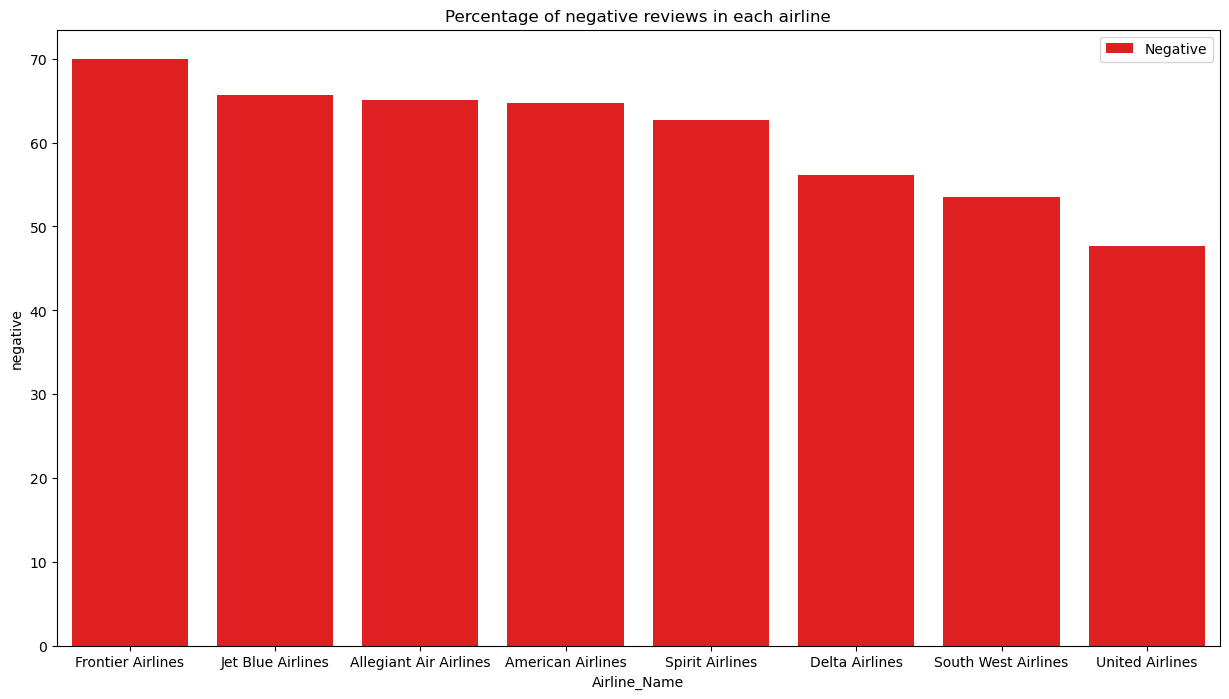

In [56]:
plt.figure(figsize=(15,8))
sns.barplot(x=sentiment_counts['Airline_Name'],y=sentiment_counts['negative'],color='red',label='Negative',order=sentiment_counts.sort_values(['negative'],ascending=False)['Airline_Name'])
plt.title('Percentage of negative reviews in each airline')
#sns.barplot(x=sentiment_counts['Airline_Name'],y=sentiment_counts['positive'],color='blue',label='Positive')
#sns.barplot(x=sentiment_counts['Airline_Name'],y=sentiment_counts['neutral'],color='yellow',label='neutral')

Text(0.5, 1.0, 'Percentage of Positive reviews in each airline')

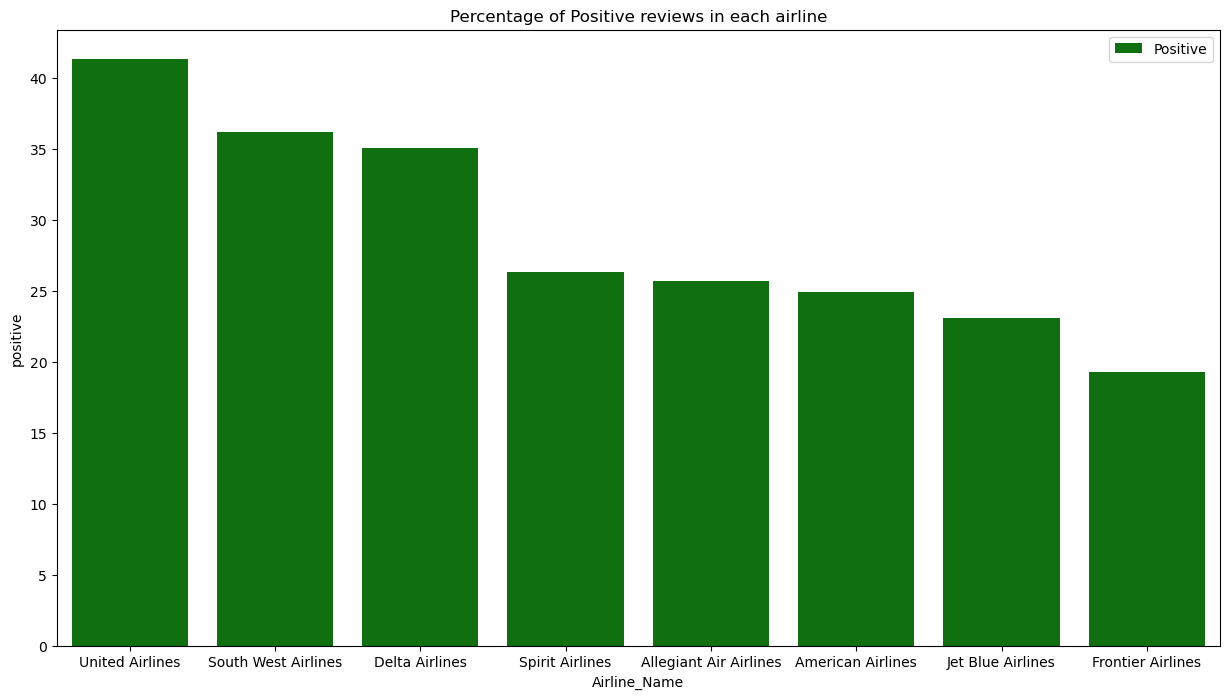

In [58]:
plt.figure(figsize=(15,8))
sns.barplot(x=sentiment_counts['Airline_Name'],y=sentiment_counts['positive'],color='green',label='Positive',order=sentiment_counts.sort_values(['positive'],ascending=False)['Airline_Name'])
plt.title('Percentage of Positive reviews in each airline')

In [59]:
roberta_sentiment_counts=reviews.groupby('Airline_Name')['roberta_sentiment'].value_counts(normalize=True).unstack()*100

In [60]:
roberta_sentiment_counts=roberta_sentiment_counts.reset_index()

In [61]:
roberta_sentiment_counts

roberta_sentiment,Airline_Name,Negative,Neutral,Positive
0,Allegiant Air Airlines,70.496454,24.255319,5.248227
1,American Airlines,71.015255,22.461862,6.522883
2,Delta Airlines,62.841091,23.515249,13.643660
3,Frontier Airlines,74.319066,23.679822,2.001112
4,Jet Blue Airlines,68.364929,25.710900,5.924171
5,South West Airlines,56.847545,29.974160,13.178295
6,Spirit Airlines,70.964187,23.801653,5.234160
7,United Airlines,64.982456,24.912281,10.105263


Text(0.5, 1.0, 'Percentage of negative reviews in each airline')

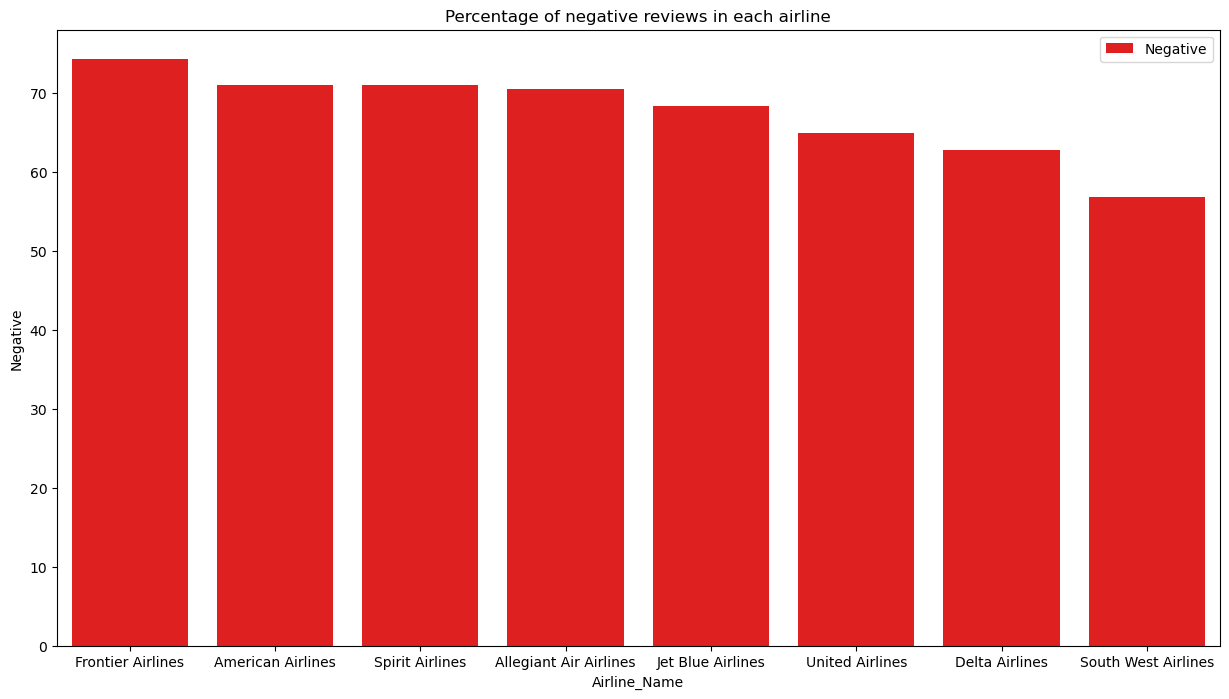

In [62]:
plt.figure(figsize=(15,8))
sns.barplot(x=roberta_sentiment_counts['Airline_Name'],y=roberta_sentiment_counts['Negative'],color='red',label='Negative',order=roberta_sentiment_counts.sort_values(['Negative'],ascending=False)['Airline_Name'])
plt.title('Percentage of negative reviews in each airline')
#sns.barplot(x=sentiment_counts['Airline_Name'],y=sentiment_counts['positive'],color='blue',label='Positive')
#sns.barplot(x=sentiment_counts['Airline_Name'],y=sentiment_counts['neutral'],color='yellow',label='neutral')

Text(0.5, 1.0, 'Percentage of Positive reviews in each airline')

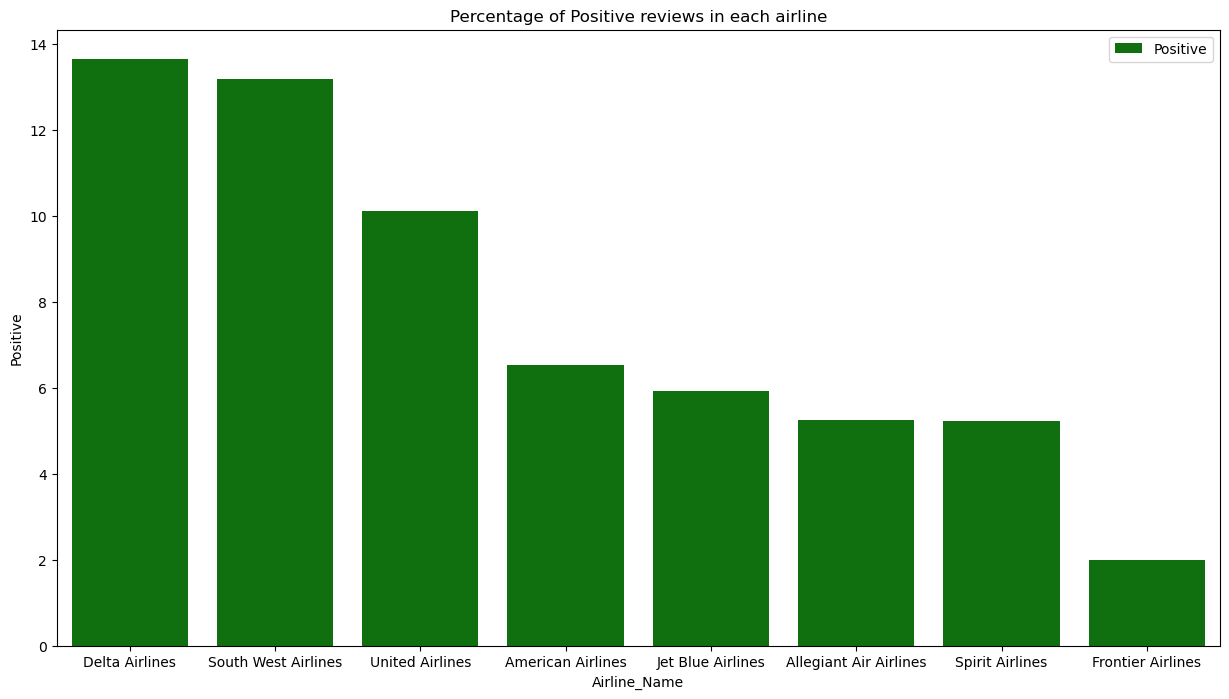

In [63]:
plt.figure(figsize=(15,8))
sns.barplot(x=roberta_sentiment_counts['Airline_Name'],y=roberta_sentiment_counts['Positive'],color='green',label='Positive',order=roberta_sentiment_counts.sort_values(['Positive'],ascending=False)['Airline_Name'])
plt.title('Percentage of Positive reviews in each airline')

Text(0.5, 1.0, 'Percentage of Neutral reviews in each airline')

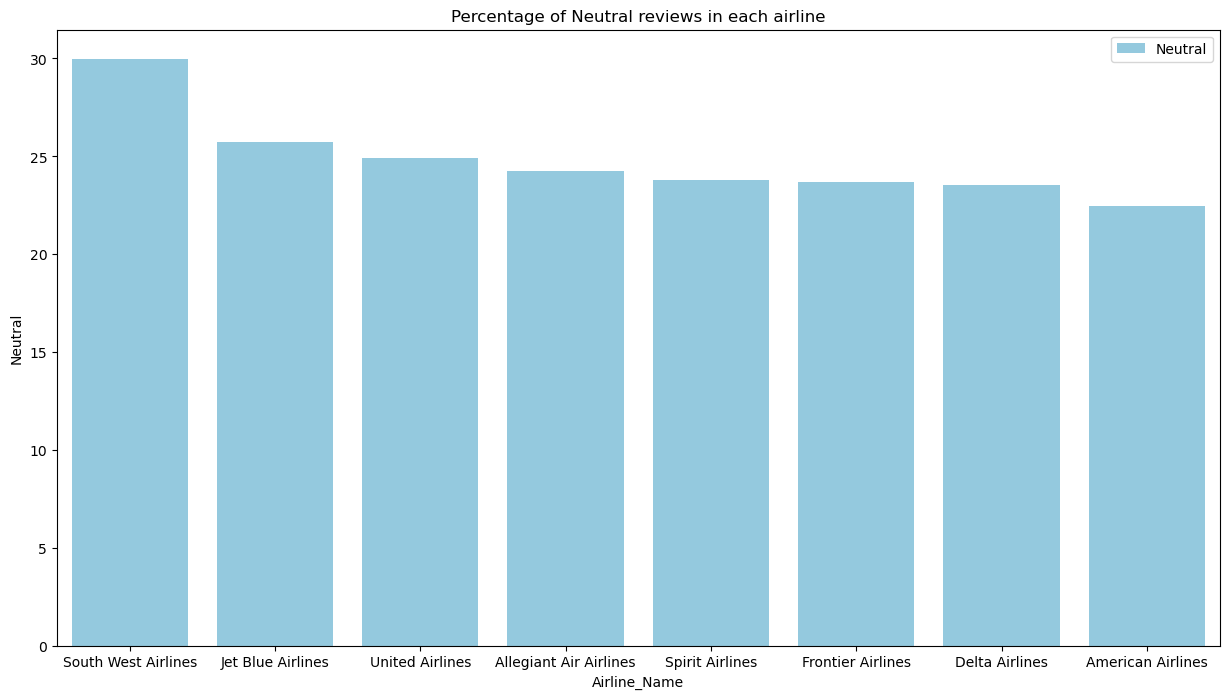

In [66]:
plt.figure(figsize=(15,8))
sns.barplot(x=roberta_sentiment_counts['Airline_Name'],y=roberta_sentiment_counts['Neutral'],color='skyblue',label='Neutral',order=roberta_sentiment_counts.sort_values(['Neutral'],ascending=False)['Airline_Name'])
plt.title('Percentage of Neutral reviews in each airline')

let's combine positive and neutral reviews in roberta sentiment

In [68]:
roberta_sentiment_counts['pos_neu_score']=roberta_sentiment_counts[['Positive','Neutral']].apply(lambda row:row['Positive']+row['Neutral'],axis=1)

In [69]:
roberta_sentiment_counts

roberta_sentiment,Airline_Name,Negative,Neutral,Positive,pos_neu_score
0,Allegiant Air Airlines,70.496454,24.255319,5.248227,29.503546
1,American Airlines,71.015255,22.461862,6.522883,28.984745
2,Delta Airlines,62.841091,23.515249,13.643660,37.158909
3,Frontier Airlines,74.319066,23.679822,2.001112,25.680934
4,Jet Blue Airlines,68.364929,25.710900,5.924171,31.635071
5,South West Airlines,56.847545,29.974160,13.178295,43.152455
6,Spirit Airlines,70.964187,23.801653,5.234160,29.035813
7,United Airlines,64.982456,24.912281,10.105263,35.017544


Text(0.5, 1.0, 'Percentage of positive and neutral reviews in each airline')

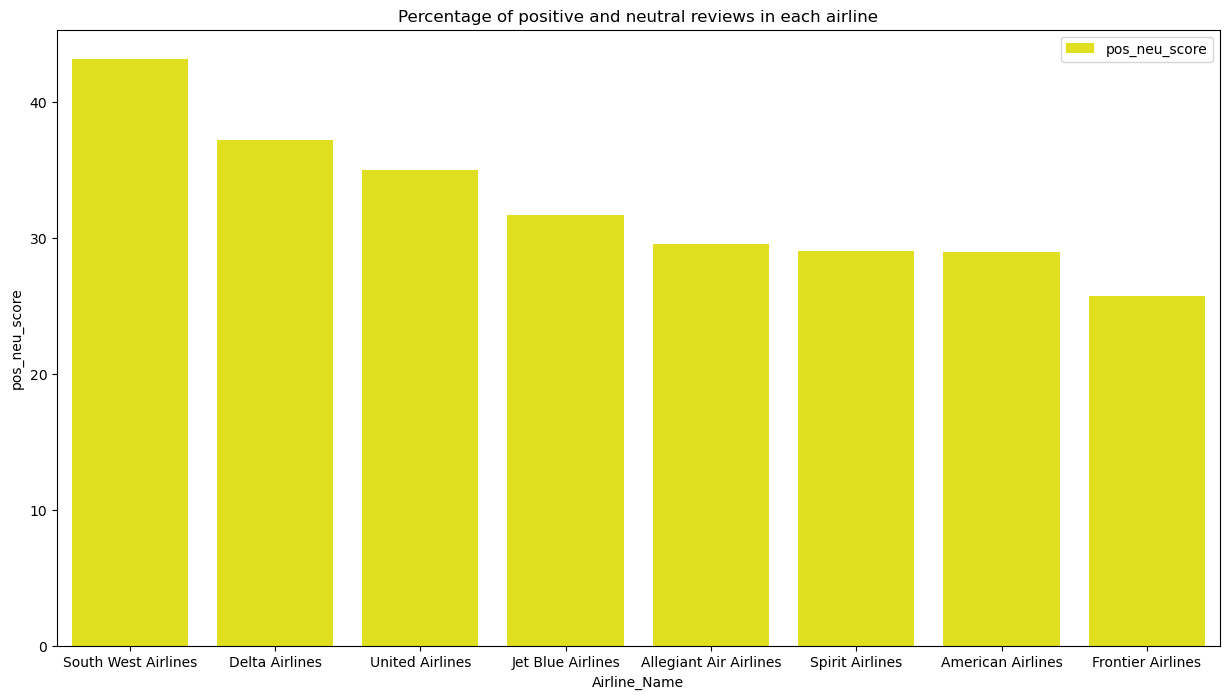

In [70]:
plt.figure(figsize=(15,8))
sns.barplot(x=roberta_sentiment_counts['Airline_Name'],y=roberta_sentiment_counts['pos_neu_score'],color='yellow',label='pos_neu_score',order=roberta_sentiment_counts.sort_values(['pos_neu_score'],ascending=False)['Airline_Name'])
plt.title('Percentage of positive and neutral reviews in each airline')

Comparing the both, roberta is the best choice for sentiment analysis as it captures the nuances and also has an ability to understand the context.

In [73]:
yearly_count=(reviews.groupby(['Airline_Name','Year_Flown'])['roberta_sentiment'].value_counts(normalize=True).unstack())*100
yearly_count=yearly_count.reset_index()
yearly_count

roberta_sentiment,Airline_Name,Year_Flown,Negative,Neutral,Positive
0,Allegiant Air Airlines,2020,52.702703,39.189189,8.108108
1,Allegiant Air Airlines,2021,75.416667,18.750000,5.833333
2,Allegiant Air Airlines,2022,71.538462,25.000000,3.461538
3,Allegiant Air Airlines,2023,71.134021,23.711340,5.154639
4,Allegiant Air Airlines,2024,64.705882,26.470588,8.823529
5,American Airlines,2020,70.289855,25.000000,4.710145
6,American Airlines,2021,71.082090,23.320896,5.597015
7,American Airlines,2022,67.775832,24.168126,8.056042
8,American Airlines,2023,73.475610,19.512195,7.012195
9,American Airlines,2024,77.368421,16.315789,6.315789


## 1b.How was the trend over the years?

Text(0.5, 1.0, 'Trend of negative reviews of airlines over the given period')

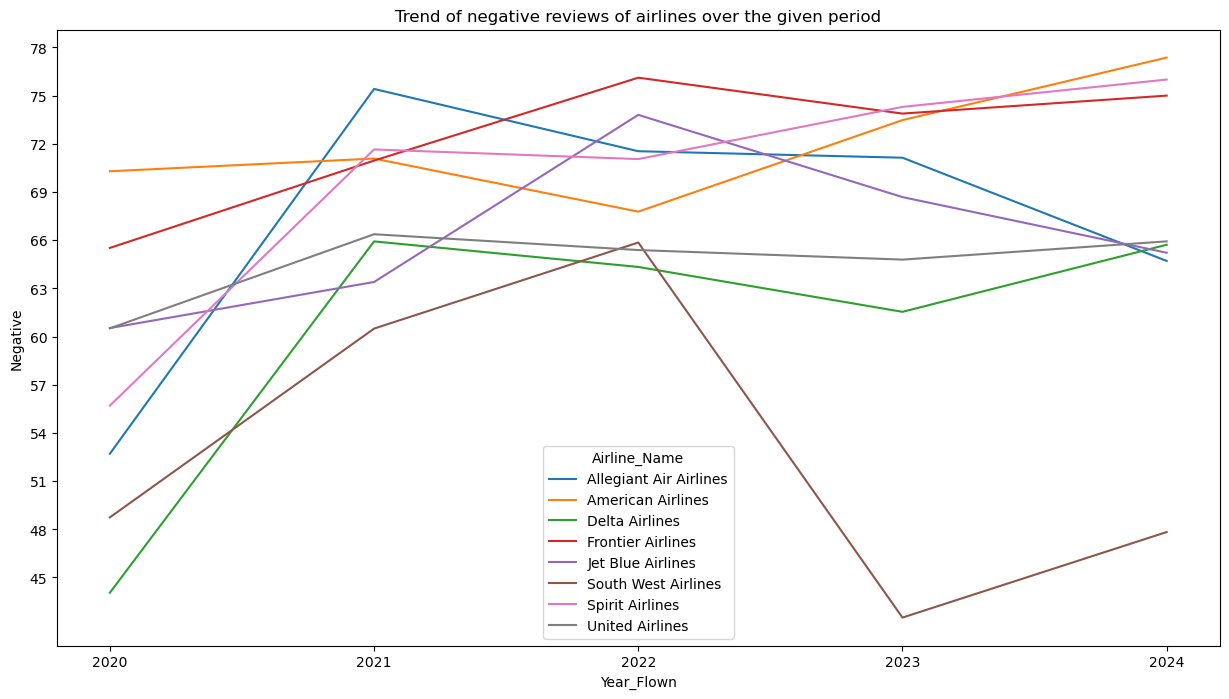

In [83]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year_Flown',y='Negative', data=yearly_count,hue='Airline_Name')
plt.xticks([2020,2021,2022,2023,2024])
plt.yticks(range(45,80,3))
plt.title('Trend of negative reviews of airlines over the given period')

Text(0.5, 1.0, 'Trend of positive reviews of airlines over the given period')

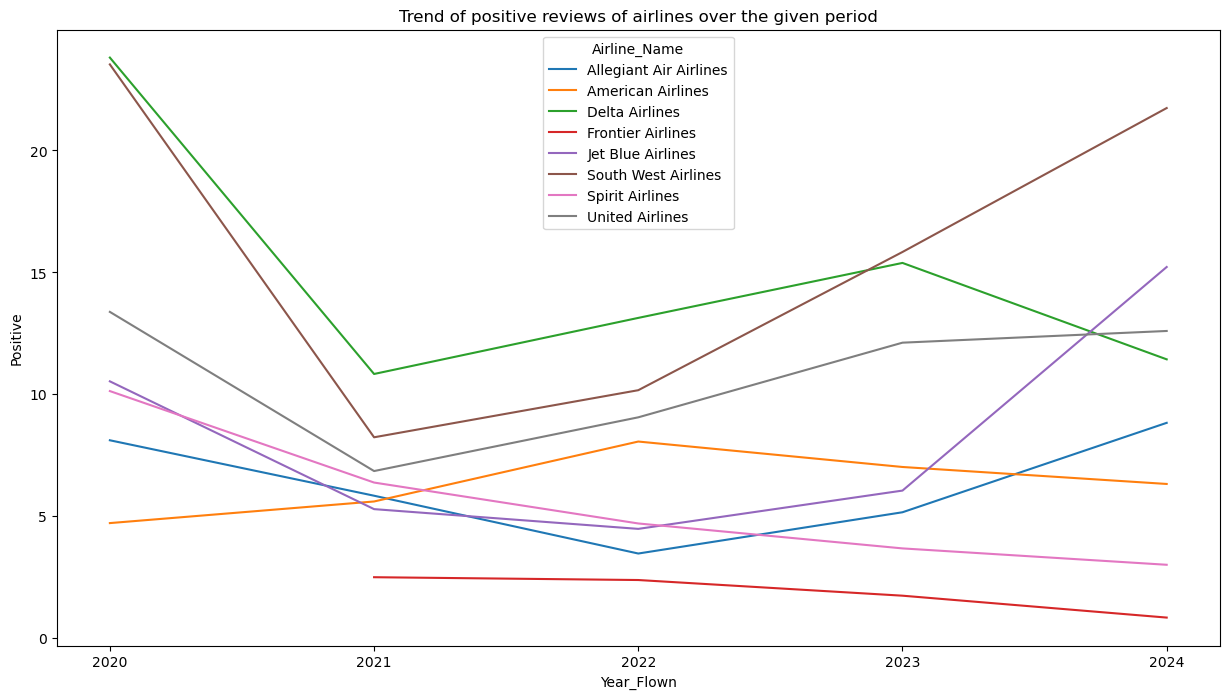

In [202]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year_Flown',y='Positive', data=yearly_count,hue='Airline_Name')
plt.xticks([2020,2021,2022,2023,2024])
plt.title('Trend of positive reviews of airlines over the given period')
#plt.yticks(range(45,80,3))

## 2.How was the overall experience for each airline?

In [84]:
reviews.columns

Index(['Experience_Summary', 'Overall_Rating', 'Customer_Name',
       'Trip_Verified', 'Experience_Detail', 'Traveller_Type', 'Seat_Type',
       'Flight_Route', 'Flight_Date', 'Seat_Comfort', 'Cabin_Staff_Service',
       'Ground_Service', 'Value_for_Money', 'Recommended',
       'Food_and_Beverages', 'Inflight_Entertainment', 'WiFi_and_Connectivity',
       'Airline_Name', 'Year_Flown', 'Month_Flown', 'Number_of_Stops',
       'Trip_Type', 'vader_sentiment', 'roberta_sentiment'],
      dtype='object')

In [86]:
overall_ratings=reviews.groupby('Airline_Name')['Overall_Rating'].mean()
overall_ratings=overall_ratings.reset_index()
overall_ratings

,Airline_Name,Overall_Rating
0,Allegiant Air Airlines,1.734752
1,American Airlines,1.974224
2,Delta Airlines,2.991974
3,Frontier Airlines,1.320178
4,Jet Blue Airlines,2.022512
5,South West Airlines,3.005168
6,Spirit Airlines,1.682645
7,United Airlines,2.451930


<Axes: title={'center': 'Average rating of each airline'}, xlabel='Airline_Name', ylabel='Overall_Rating'>

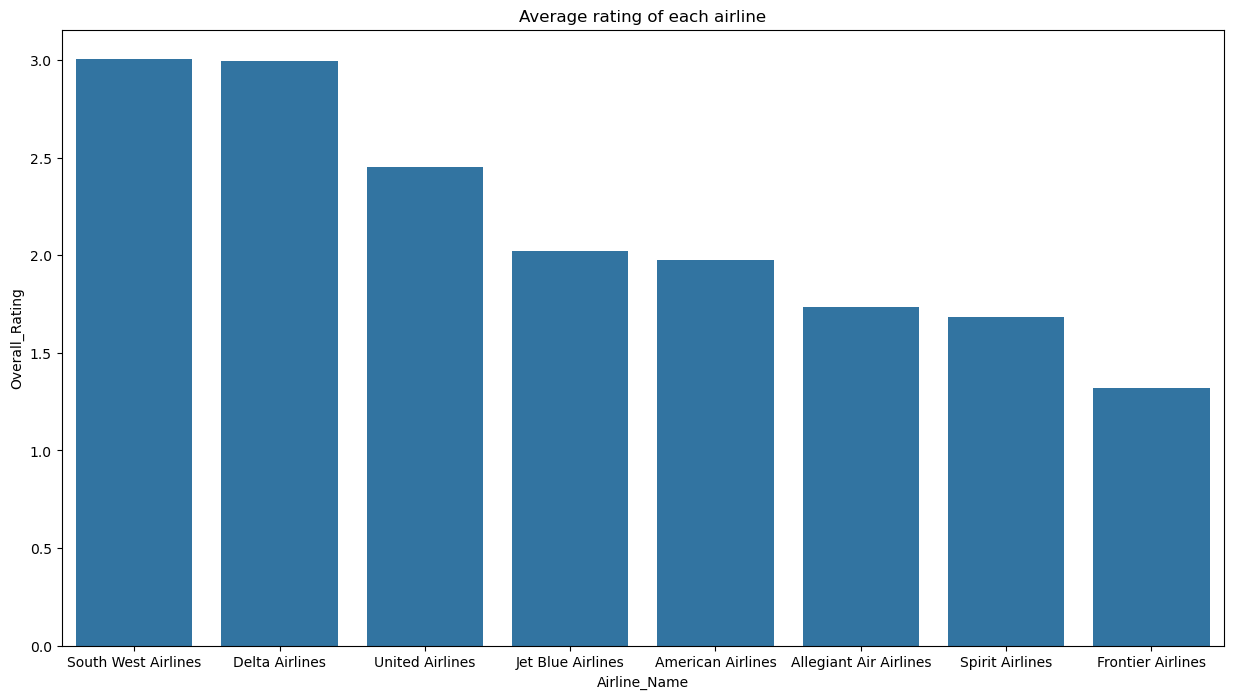

In [89]:
plt.figure(figsize=(15,8))
plt.title('Average rating of each airline')
sns.barplot(x='Airline_Name',y='Overall_Rating',data=overall_ratings,order=overall_ratings.sort_values('Overall_Rating',ascending=False)['Airline_Name'])

## 3. What percentage of people are recommending the airlines?

In [92]:
recommended=reviews.groupby('Airline_Name')['Recommended'].value_counts(normalize=True)*100
recommended=recommended.reset_index()
recommended

,Airline_Name,Recommended,proportion
0,Allegiant Air Airlines,no,92.340426
1,Allegiant Air Airlines,yes,7.659574
2,American Airlines,no,91.215150
3,American Airlines,yes,8.784850
4,Delta Airlines,no,78.892456
5,Delta Airlines,yes,21.107544
6,Frontier Airlines,no,97.720956
7,Frontier Airlines,yes,2.279044
8,Jet Blue Airlines,no,91.350711
9,Jet Blue Airlines,yes,8.649289


In [95]:
recommended_yes=recommended[recommended['Recommended']=='yes']
recommended_yes

,Airline_Name,Recommended,proportion
1,Allegiant Air Airlines,yes,7.659574
3,American Airlines,yes,8.784850
5,Delta Airlines,yes,21.107544
7,Frontier Airlines,yes,2.279044
9,Jet Blue Airlines,yes,8.649289
11,South West Airlines,yes,21.963824
13,Spirit Airlines,yes,6.721763
15,United Airlines,yes,14.526316


<Axes: title={'center': 'Percentage of people recommending the airlines'}, xlabel='Airline_Name', ylabel='proportion'>

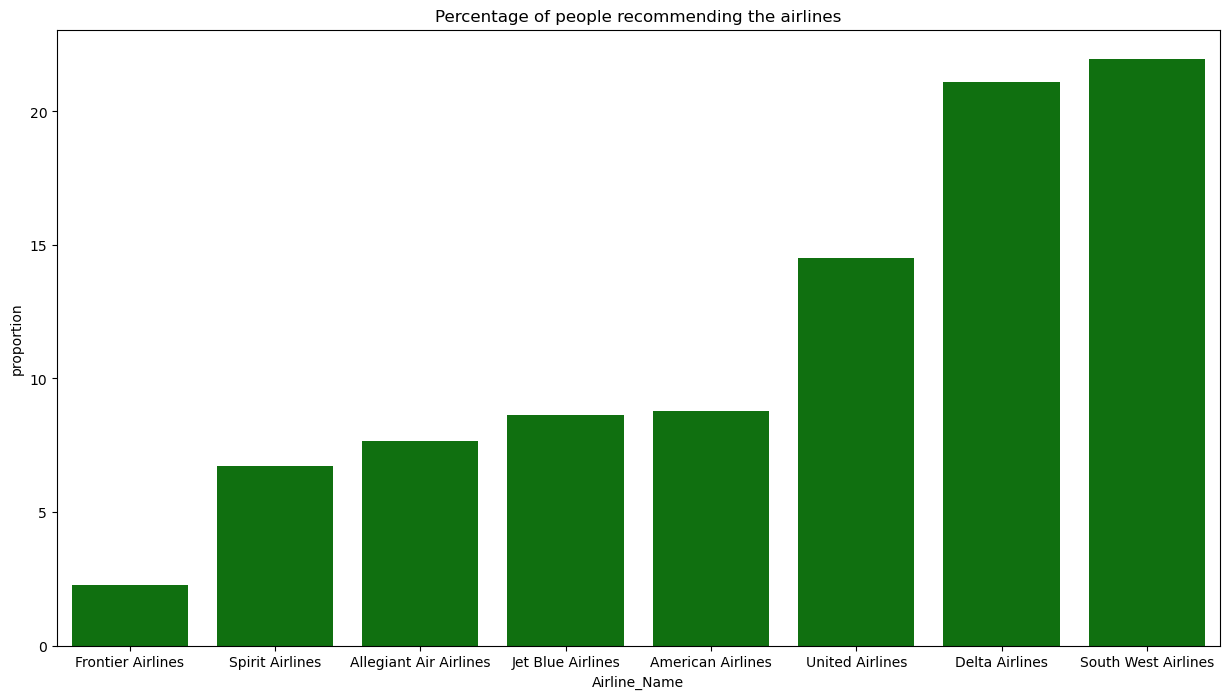

In [98]:
plt.figure(figsize=(15,8))
plt.title('Percentage of people recommending the airlines')
sns.barplot(x='Airline_Name',y='proportion',data=recommended_yes,color='green', order=recommended_yes.sort_values('proportion',ascending=True)['Airline_Name'])

## 4.What are the factors that influencing the recommendation of the airline?

To understand the effect on recommendation, first, let us convert it into numerical value

In [99]:
from sklearn.preprocessing import LabelEncoder

In [101]:
lb=LabelEncoder()

In [102]:
reviews['Recommended']=lb.fit_transform(reviews['Recommended'])

In [103]:
reviews['Recommended'].value_counts()

Recommended
0    9412
1    1097
Name: count, dtype: int64

In [105]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10509 entries, 0 to 10508
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Experience_Summary      10508 non-null  object 
 1   Overall_Rating          10509 non-null  int64  
 2   Customer_Name           10509 non-null  object 
 3   Trip_Verified           10509 non-null  float64
 4   Experience_Detail       10509 non-null  object 
 5   Traveller_Type          10509 non-null  object 
 6   Seat_Type               10509 non-null  object 
 7   Flight_Route            10509 non-null  object 
 8   Flight_Date             10509 non-null  object 
 9   Seat_Comfort            10509 non-null  float64
 10  Cabin_Staff_Service     10509 non-null  float64
 11  Ground_Service          10509 non-null  float64
 12  Value_for_Money         10509 non-null  float64
 13  Recommended             10509 non-null  int64  
 14  Food_and_Beverages      10509 non-null  flo

In [107]:
numerical_columns=reviews.select_dtypes(['float64','int64']).columns
numerical_columns

Index(['Overall_Rating', 'Trip_Verified', 'Seat_Comfort',
       'Cabin_Staff_Service', 'Ground_Service', 'Value_for_Money',
       'Recommended', 'Food_and_Beverages', 'Inflight_Entertainment',
       'WiFi_and_Connectivity', 'Year_Flown', 'Number_of_Stops'],
      dtype='object')

Let us find out the correlation between the Recommended and other numerical values

<Axes: >

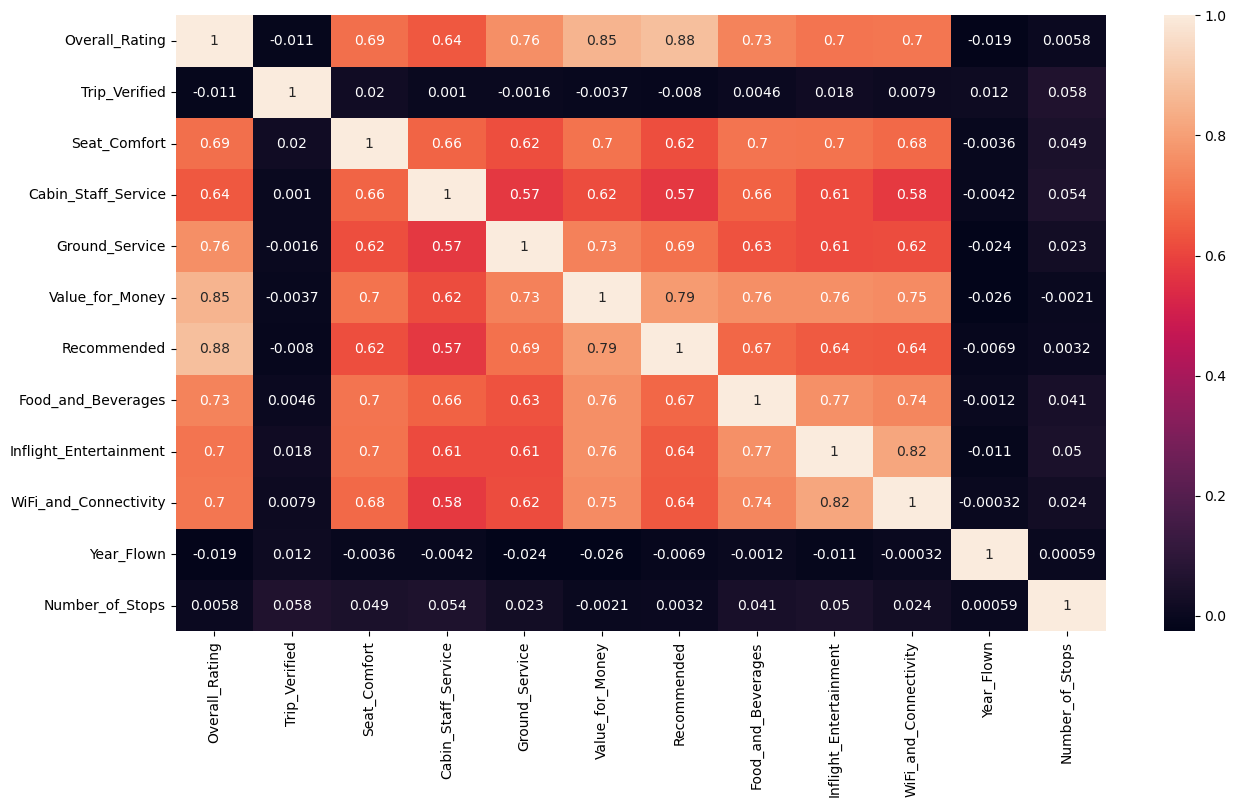

In [110]:
correlation_matrix=reviews[numerical_columns].corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True)

In [111]:
dir(correlation_matrix)

['Cabin_Staff_Service',
 'Food_and_Beverages',
 'Ground_Service',
 'Inflight_Entertainment',
 'Number_of_Stops',
 'Overall_Rating',
 'Recommended',
 'Seat_Comfort',
 'T',
 'Trip_Verified',
 'Value_for_Money',
 'WiFi_and_Connectivity',
 'Year_Flown',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '

In [113]:
correlation_matrix.Recommended.sort_values(ascending=False)

Recommended               1.000000
Overall_Rating            0.882635
Value_for_Money           0.790569
Ground_Service            0.694601
Food_and_Beverages        0.674118
Inflight_Entertainment    0.644108
WiFi_and_Connectivity     0.642304
Seat_Comfort              0.621326
Cabin_Staff_Service       0.574256
Number_of_Stops           0.003182
Year_Flown               -0.006919
Trip_Verified            -0.007969
Name: Recommended, dtype: float64

From the figure above, the top five factors with highest correlations with Recommended may have huge impact on Recommended, however correlation alone does not fully explain the impact. We might also need to do Regression analysis to confirm the strength. Along with that, methods such as decision trees or random forest provide insights into the relative importance of each feature, allowing for a more nuanced understanding of how these factors collectively impact customer recommendations.

## 5. There are various services in the data. Which airline excels in each of the service?

In [114]:
reviews.columns

Index(['Experience_Summary', 'Overall_Rating', 'Customer_Name',
       'Trip_Verified', 'Experience_Detail', 'Traveller_Type', 'Seat_Type',
       'Flight_Route', 'Flight_Date', 'Seat_Comfort', 'Cabin_Staff_Service',
       'Ground_Service', 'Value_for_Money', 'Recommended',
       'Food_and_Beverages', 'Inflight_Entertainment', 'WiFi_and_Connectivity',
       'Airline_Name', 'Year_Flown', 'Month_Flown', 'Number_of_Stops',
       'Trip_Type', 'vader_sentiment', 'roberta_sentiment'],
      dtype='object')

In [118]:
seat_comfort=reviews.groupby('Airline_Name')['Seat_Comfort'].mean().to_frame().reset_index()
seat_comfort_order=seat_comfort.sort_values('Seat_Comfort',ascending=False)['Airline_Name']
seat_comfort_order

2            Delta Airlines
5       South West Airlines
4         Jet Blue Airlines
7           United Airlines
1         American Airlines
0    Allegiant Air Airlines
6           Spirit Airlines
3         Frontier Airlines
Name: Airline_Name, dtype: object

In [119]:
seat_comfort

,Airline_Name,Seat_Comfort
0,Allegiant Air Airlines,1.568794
1,American Airlines,1.859548
2,Delta Airlines,2.349920
3,Frontier Airlines,1.346304
4,Jet Blue Airlines,2.068720
5,South West Airlines,2.177003
6,Spirit Airlines,1.411570
7,United Airlines,1.981053


Text(0.5, 1.0, 'Average Seat comfort ratings for each airline')

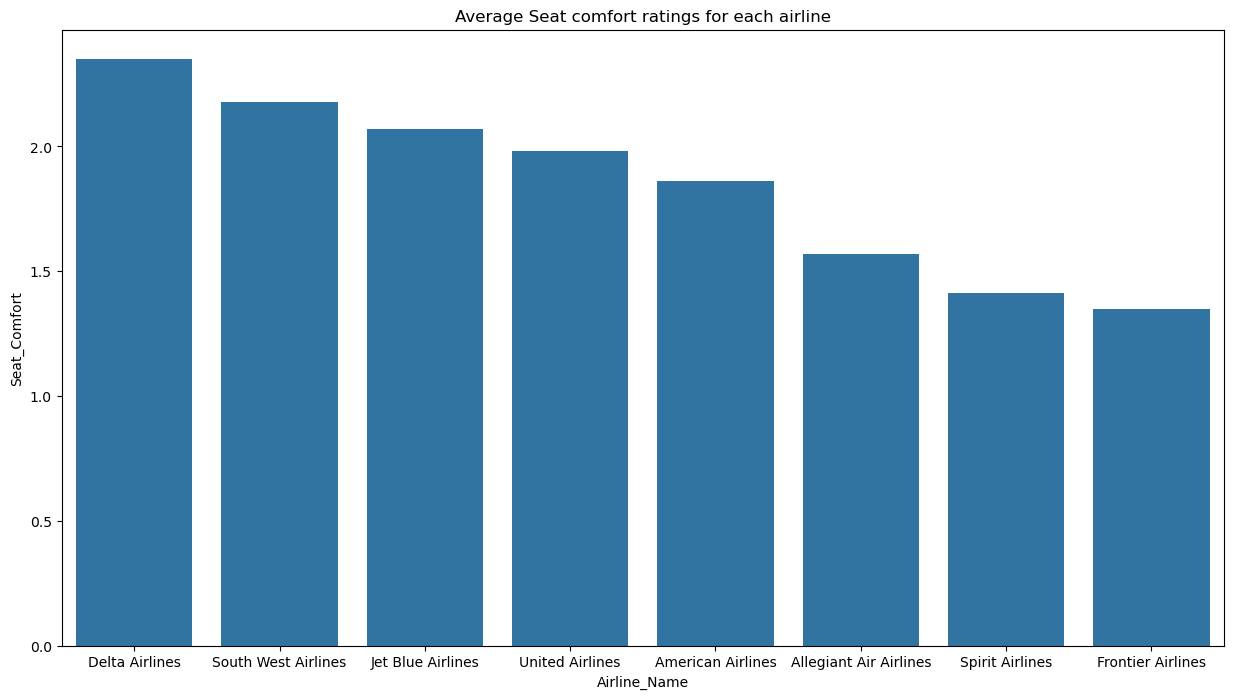

In [121]:
plt.figure(figsize=(15,8))
sns.barplot(x='Airline_Name',y='Seat_Comfort',data=seat_comfort,order=seat_comfort_order)
plt.title('Average Seat comfort ratings for each airline')

We need to duplicate the above code for each service, instead we can use a for loop.

In [133]:
services= ['Seat_Comfort', 'Cabin_Staff_Service','Ground_Service','Food_and_Beverages', 'Inflight_Entertainment', 'WiFi_and_Connectivity']
colors=['blue','red','green','yellow','black','orange']

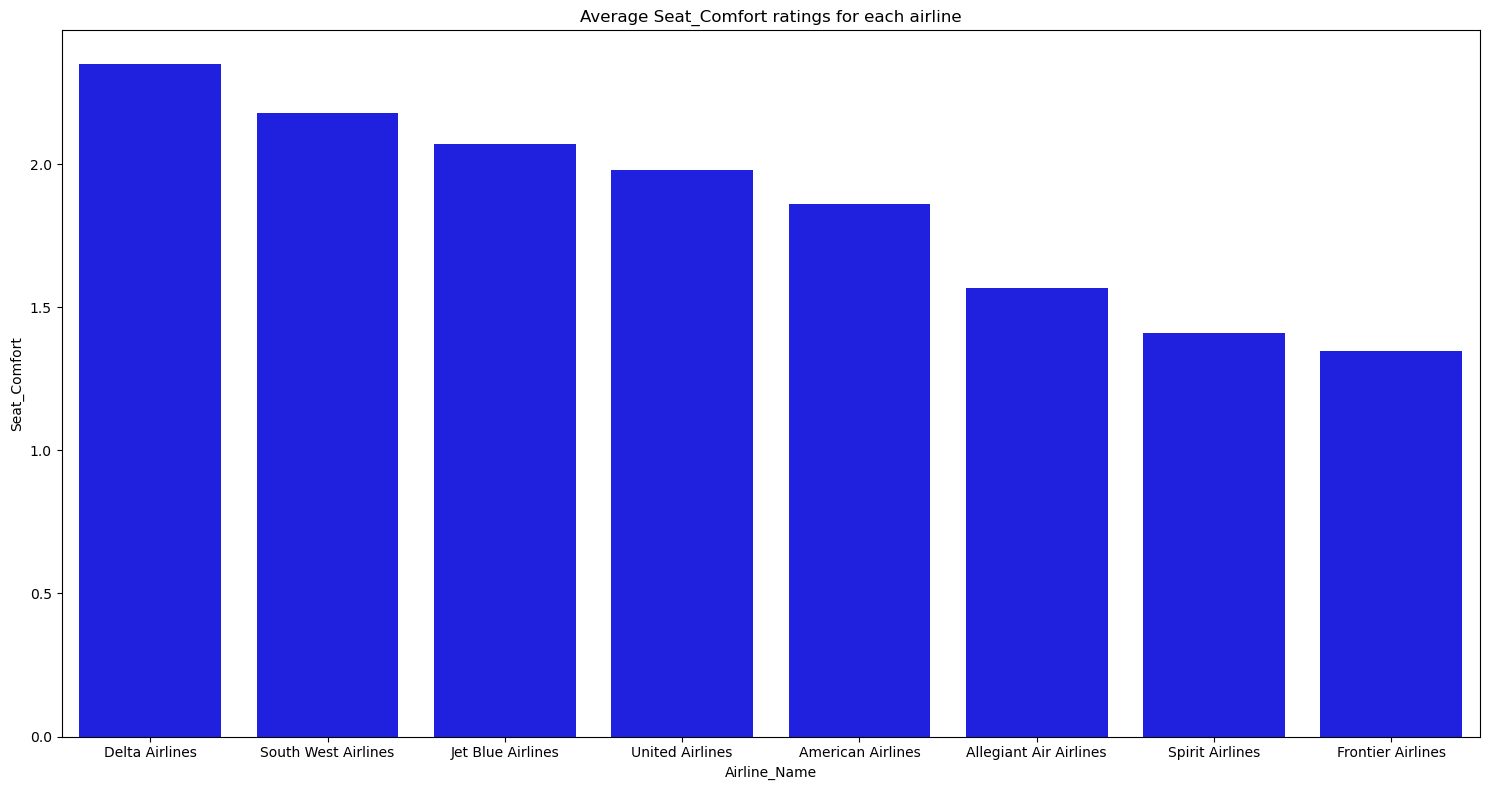

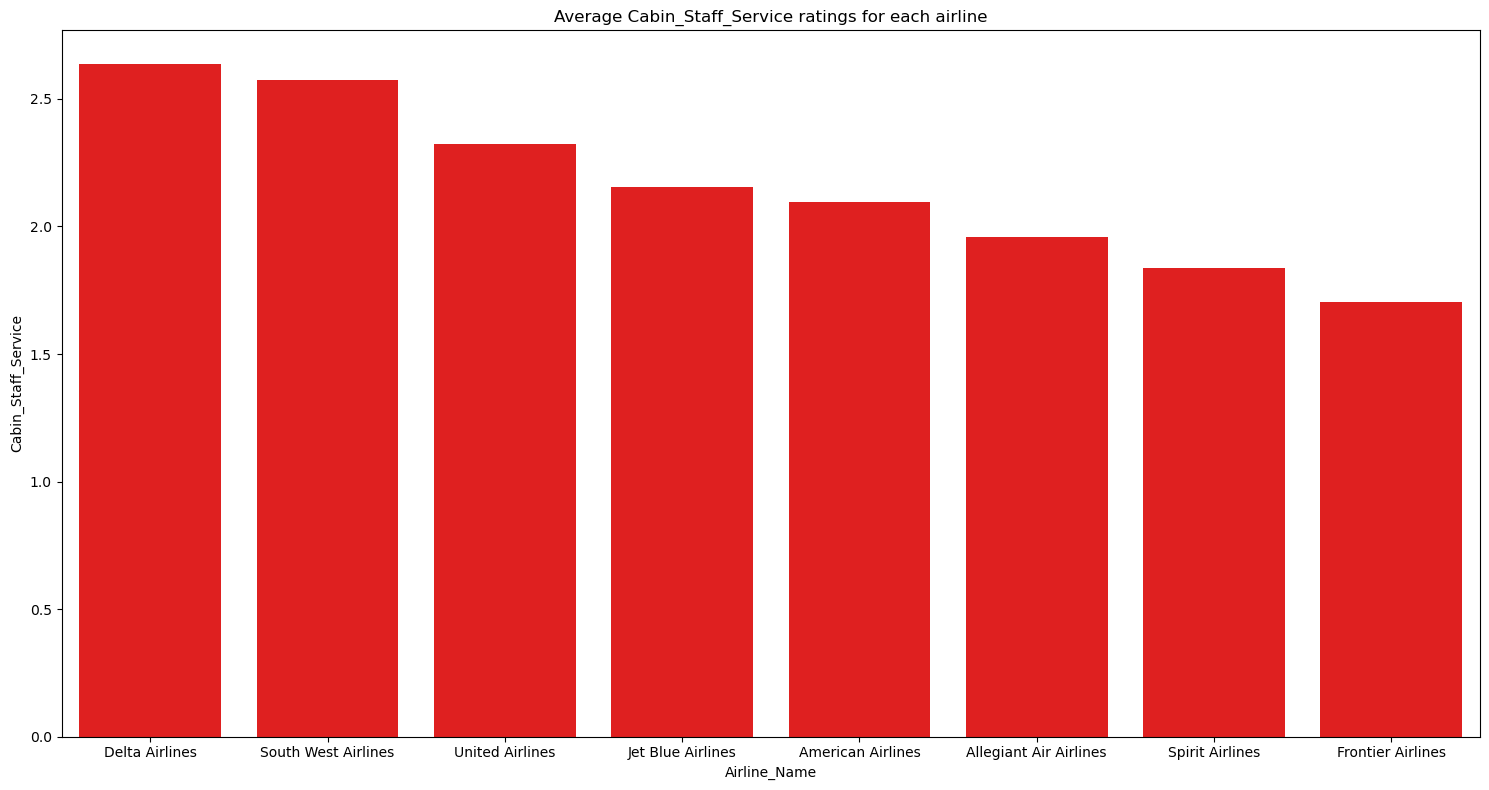

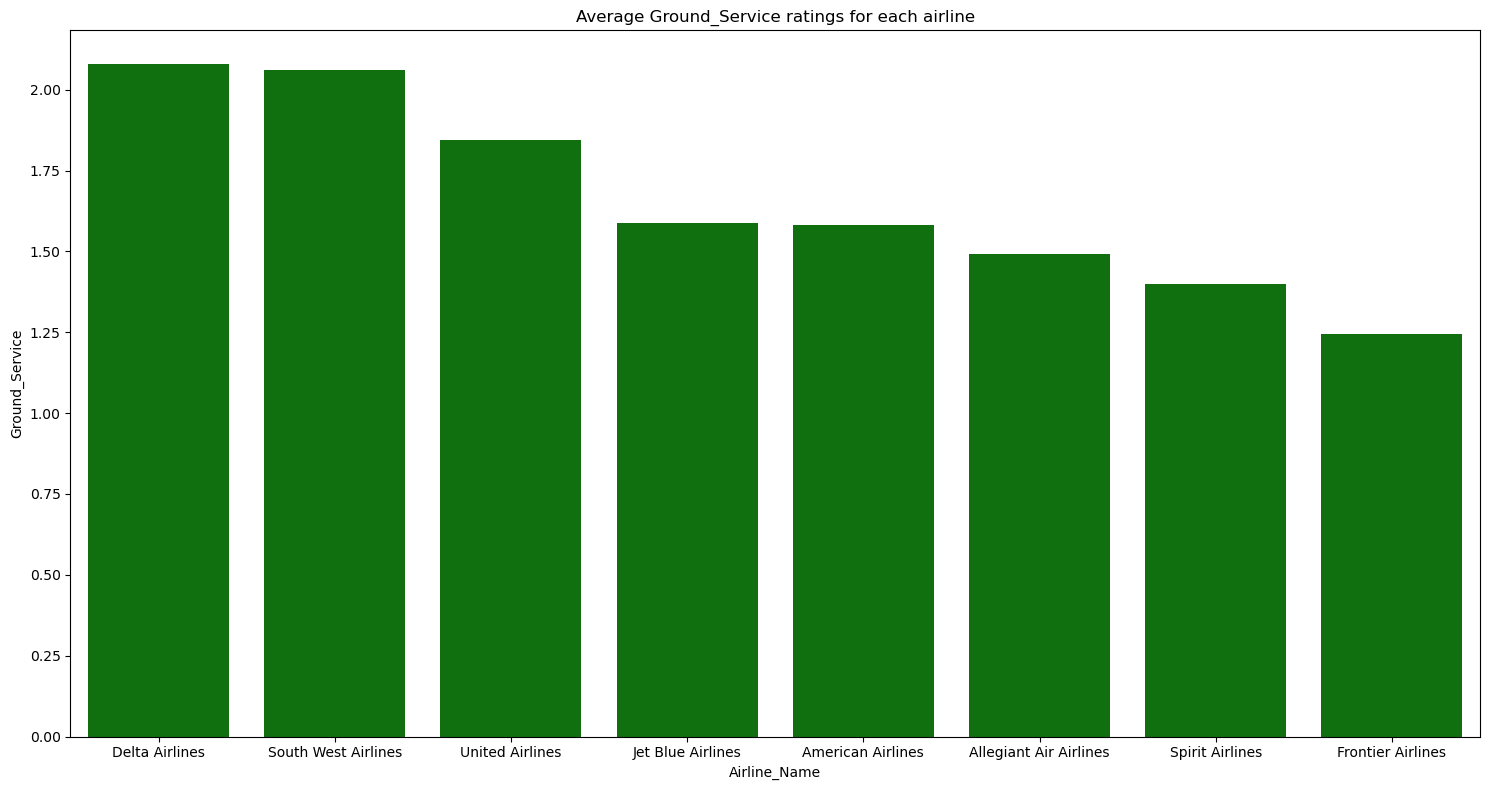

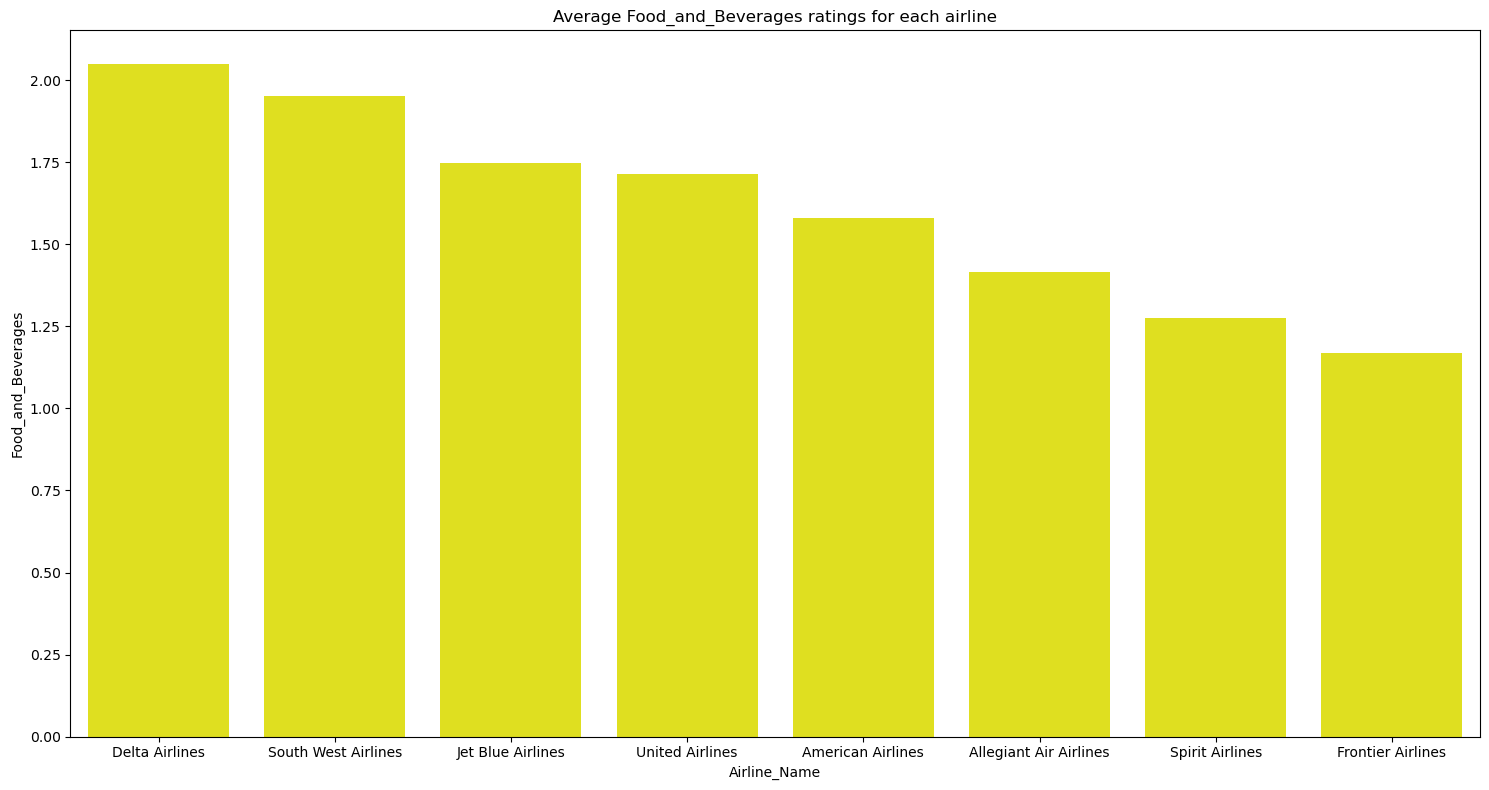

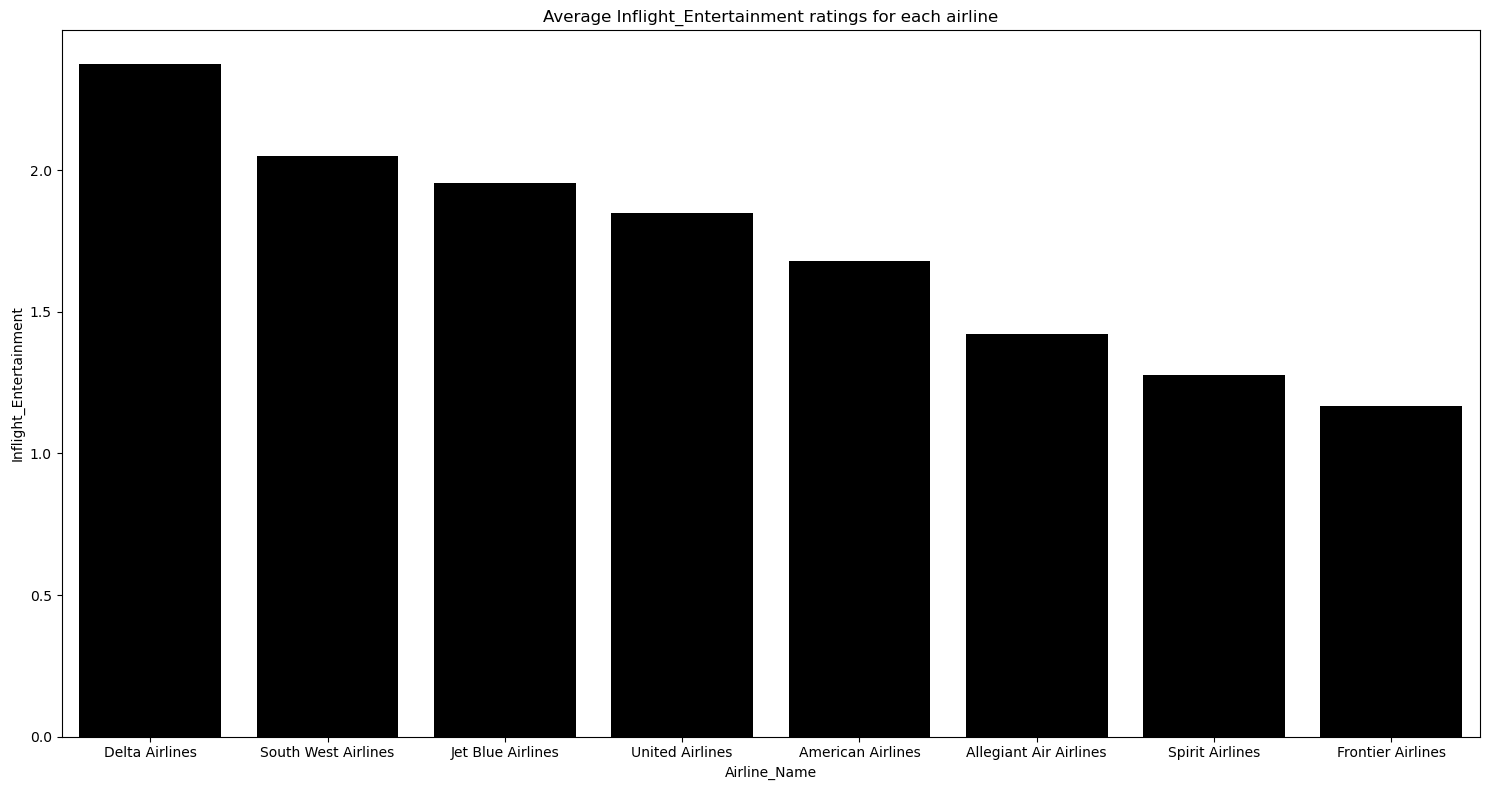

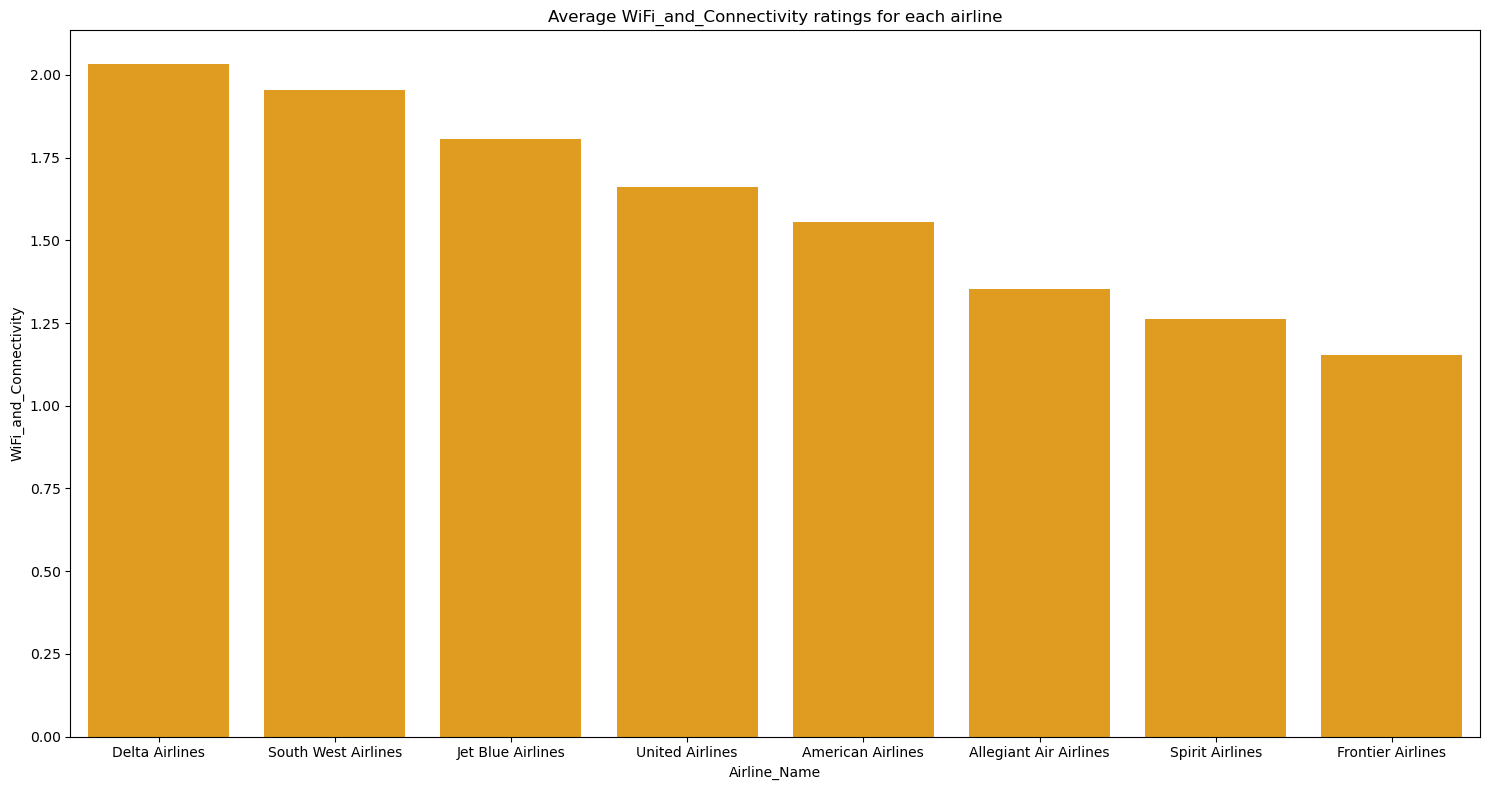

In [135]:
for each,color in zip(services,colors):
    data=reviews.groupby('Airline_Name')[each].mean().to_frame().reset_index()
    order=data.sort_values(each,ascending=False)['Airline_Name']
    plt.figure(figsize=(15,8))
    sns.barplot(x='Airline_Name',y=each,data=data,order=order,color=color)
    plt.title(f'Average {each} ratings for each airline')
    #plt.xticks(rotation=90)
    plt.tight_layout()  # Ensure the layout fits well
    plt.savefig(f'{each}_ratings_large.png')  # Save each plot to a separate file

    # Show the plot if needed
    plt.show()

    
    
    
    
    
    

## 6. What was the seat preferences of different traveller types?

In [146]:
reviews.columns

Index(['Experience_Summary', 'Overall_Rating', 'Customer_Name',
       'Trip_Verified', 'Experience_Detail', 'Traveller_Type', 'Seat_Type',
       'Flight_Route', 'Flight_Date', 'Seat_Comfort', 'Cabin_Staff_Service',
       'Ground_Service', 'Value_for_Money', 'Recommended',
       'Food_and_Beverages', 'Inflight_Entertainment', 'WiFi_and_Connectivity',
       'Airline_Name', 'Year_Flown', 'Month_Flown', 'Number_of_Stops',
       'Trip_Type', 'vader_sentiment', 'roberta_sentiment'],
      dtype='object')

In [147]:
reviews['Traveller_Type'].value_counts()

Traveller_Type
Family Leisure    3335
Solo Leisure      3314
Couple Leisure    2533
Business          1327
Name: count, dtype: int64

In [157]:
seat_preferences=(reviews.groupby(['Traveller_Type'])['Seat_Type'].value_counts(normalize=True).unstack()*100).reset_index()
seat_preferences

Seat_Type,Traveller_Type,Business Class,Economy Class,First Class,Premium Economy
0,Business,6.103994,80.180859,6.405426,7.309721
1,Couple Leisure,2.724043,88.669562,3.237268,5.369128
2,Family Leisure,1.619190,93.253373,1.289355,3.838081
3,Solo Leisure,2.353651,90.434520,2.926976,4.284852


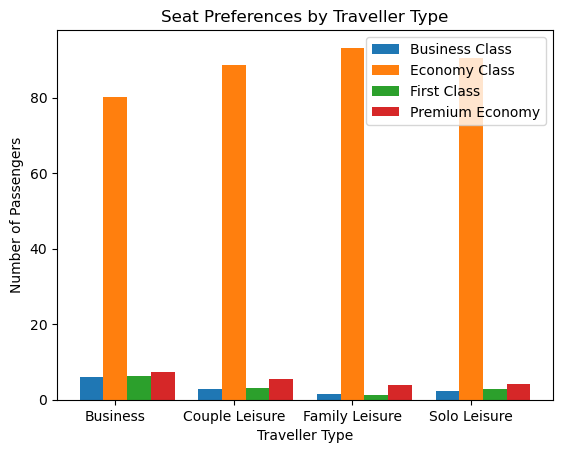

In [164]:
# Number of traveller types
n = len(seat_preferences['Traveller_Type'])

# Set the bar width
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(n)  # Positions for Business Class
r2 = [x + bar_width for x in r1]  # Positions for Economy Class
r3 = [x + bar_width for x in r2]  # Positions for First Class
r4 = [x + bar_width for x in r3]  # Positions for Premium Economy

# Create the bars
plt.bar(r1, seat_preferences['Business Class'], width=bar_width, label='Business Class')
plt.bar(r2, seat_preferences['Economy Class'], width=bar_width, label='Economy Class')
plt.bar(r3, seat_preferences['First Class'], width=bar_width, label='First Class')
plt.bar(r4, seat_preferences['Premium Economy'], width=bar_width, label='Premium Economy')

# Add labels and title
plt.xlabel('Traveller Type')
plt.ylabel('Number of Passengers')
plt.title('Seat Preferences by Traveller Type')
plt.xticks([r + bar_width for r in range(n)], seat_preferences['Traveller_Type'])  # Set the x-ticks to be in the center
plt.legend()  # Show legend
plt.show()

## 7.Does number of stops/layovers have an impact on overall experience?

In [136]:
reviews.columns

Index(['Experience_Summary', 'Overall_Rating', 'Customer_Name',
       'Trip_Verified', 'Experience_Detail', 'Traveller_Type', 'Seat_Type',
       'Flight_Route', 'Flight_Date', 'Seat_Comfort', 'Cabin_Staff_Service',
       'Ground_Service', 'Value_for_Money', 'Recommended',
       'Food_and_Beverages', 'Inflight_Entertainment', 'WiFi_and_Connectivity',
       'Airline_Name', 'Year_Flown', 'Month_Flown', 'Number_of_Stops',
       'Trip_Type', 'vader_sentiment', 'roberta_sentiment'],
      dtype='object')

In [137]:
reviews['Number_of_Stops'].value_counts()

Number_of_Stops
0.0    8698
1.0    1773
2.0      38
Name: count, dtype: int64

<Axes: >

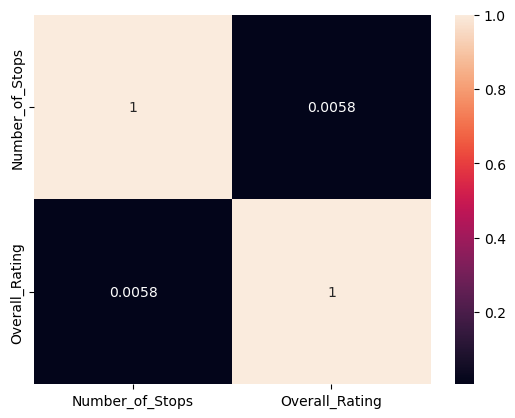

In [139]:
sns.heatmap(reviews[['Number_of_Stops','Overall_Rating']].corr(),annot=True)

In [140]:
reviews.groupby('Number_of_Stops')['Overall_Rating'].mean()

Number_of_Stops
0.0    2.055990
1.0    2.078962
2.0    2.394737
Name: Overall_Rating, dtype: float64

In [145]:
reviews.groupby(['Number_of_Stops'])['roberta_sentiment'].value_counts(normalize=True).unstack()*100

roberta_sentiment,Negative,Neutral,Positive
Number_of_Stops,,,
0.0,68.797425,23.982525,7.220051
1.0,67.061478,25.944726,6.993796
2.0,65.789474,18.421053,15.789474


## 8. What was the effect of review length on the overall experience and sentiment?

In [169]:
import re


In [170]:
def length_reviews(text):
    word_count= len(re.findall(r'\b\w+\b', text))
    return word_count

In [171]:
reviews['length_of_review']=reviews['Experience_Detail'].apply(length_reviews)

In [172]:
reviews.head()

,Experience_Summary,Overall_Rating,Customer_Name,Trip_Verified,Experience_Detail,Traveller_Type,Seat_Type,Flight_Route,Flight_Date,Seat_Comfort,...,Inflight_Entertainment,WiFi_and_Connectivity,Airline_Name,Year_Flown,Month_Flown,Number_of_Stops,Trip_Type,vader_sentiment,roberta_sentiment,length_of_review
0,This has been a total nightmare,1,V Darkana,1.0,My flight was scheduled on July 4 2021 Sunda...,Family Leisure,Economy Class,Anchorage to San Francisco,Jul-21,1.0,...,3.0,1.0,United Airlines,2021,July,0.0,International,negative,Negative,129
1,beyond appalled by this experience,1,Bishop Jermaine Moore Sr.,0.0,United Airlines have successfully and repetit...,Family Leisure,Economy Class,Pittsburgh to Dubai via Newark,May-23,3.0,...,1.0,1.0,United Airlines,2023,May,1.0,International,negative,Negative,62
2,Both segments were awful,1,J Parcell,1.0,Both segments were awful. The single agent f...,Solo Leisure,Economy Class,Montrose to Denver,Jul-21,2.0,...,1.0,1.0,United Airlines,2021,July,0.0,International,negative,Negative,153
3,never fly through this airline again,1,S Laytan,1.0,We reviewed the dimensions and the sizes on ...,Family Leisure,Economy Class,Pasco to Miami,Jun-21,1.0,...,1.0,1.0,United Airlines,2021,June,0.0,International,positive,Neutral,111
4,fly other airlines in the future,1,Nancy S Giannetta,1.0,So as I boarded I ask for help putting my ca...,Solo Leisure,Business Class,Chicago to Tampa,Apr-24,2.0,...,2.0,1.0,United Airlines,2024,April,0.0,International,positive,Neutral,122


In [173]:
reviews['sent_num']=lb.fit_transform(reviews['roberta_sentiment'])

/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_1057/244159381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='roberta_sentiment', y='length_of_review', data=reviews, palette='viridis')


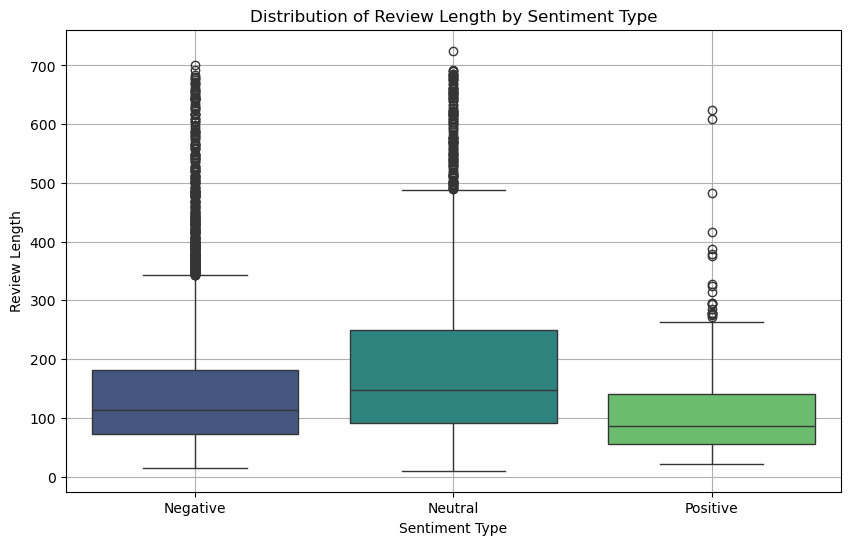

In [175]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='roberta_sentiment', y='length_of_review', data=reviews, palette='viridis')
plt.title('Distribution of Review Length by Sentiment Type')
plt.xlabel('Sentiment Type')
plt.ylabel('Review Length')
plt.grid()

/var/folders/0n/xvnlc6tj4b912wtm7gxtwn680000gn/T/ipykernel_1057/3980008309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vader_sentiment', y='length_of_review', data=reviews[reviews['length_of_review']<350], palette='viridis')


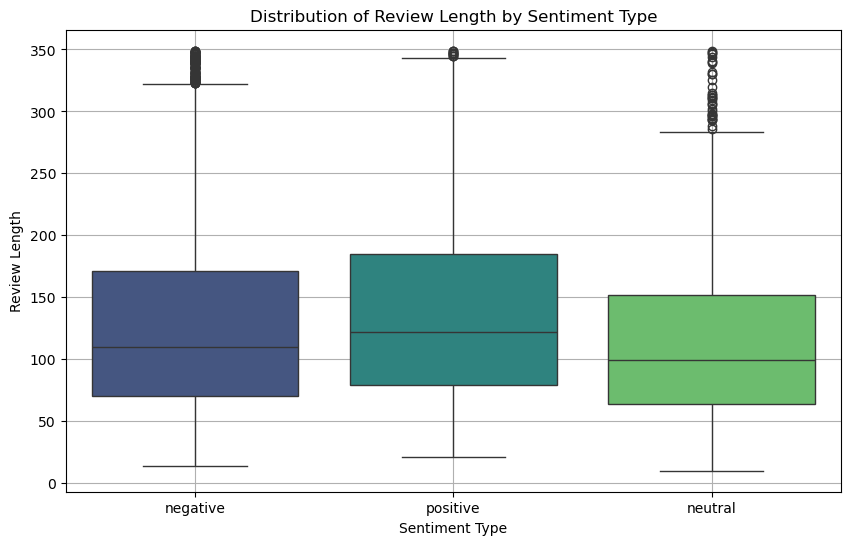

In [178]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='vader_sentiment', y='length_of_review', data=reviews[reviews['length_of_review']<350], palette='viridis')
plt.title('Distribution of Review Length by Sentiment Type')
plt.xlabel('Sentiment Type')
plt.ylabel('Review Length')
plt.grid()

<Axes: >

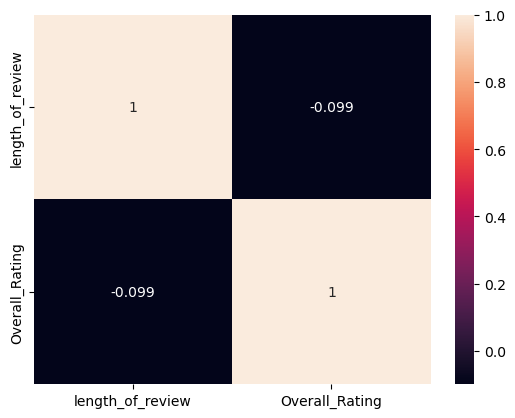

In [179]:
sns.heatmap(reviews[['length_of_review','Overall_Rating']].corr(),annot=True)

## 9.How was the trend on holiday months like May, June, July and December versus non holiday? 

In [180]:
reviews.columns

Index(['Experience_Summary', 'Overall_Rating', 'Customer_Name',
       'Trip_Verified', 'Experience_Detail', 'Traveller_Type', 'Seat_Type',
       'Flight_Route', 'Flight_Date', 'Seat_Comfort', 'Cabin_Staff_Service',
       'Ground_Service', 'Value_for_Money', 'Recommended',
       'Food_and_Beverages', 'Inflight_Entertainment', 'WiFi_and_Connectivity',
       'Airline_Name', 'Year_Flown', 'Month_Flown', 'Number_of_Stops',
       'Trip_Type', 'vader_sentiment', 'roberta_sentiment', 'length_of_review',
       'sent_num'],
      dtype='object')

In [181]:
reviews['Month_Flown'].value_counts()

Month_Flown
July         1275
June         1260
March        1068
April         945
August        942
May           926
December      755
February      728
October       716
January       676
September     669
November      549
Name: count, dtype: int64

In [182]:
reviews_holiday= reviews[reviews['Month_Flown'].isin(['June','July','August','December'])]
reviews_holiday.shape

(4232, 26)

In [185]:
holiday_sentiments=reviews_holiday.groupby('Airline_Name')['roberta_sentiment'].value_counts(normalize=True).unstack()*100
holiday_sentiments=holiday_sentiments.reset_index()
holiday_sentiments

roberta_sentiment,Airline_Name,Negative,Neutral,Positive
0,Allegiant Air Airlines,70.491803,23.934426,5.573770
1,American Airlines,70.975610,23.170732,5.853659
2,Delta Airlines,64.717349,23.001949,12.280702
3,Frontier Airlines,74.159021,23.241590,2.599388
4,Jet Blue Airlines,68.266667,26.666667,5.066667
5,South West Airlines,57.500000,31.562500,10.937500
6,Spirit Airlines,69.860896,24.729521,5.409583
7,United Airlines,69.899666,23.076923,7.023411


In [188]:
non_holiday= reviews[~(reviews['Month_Flown'].isin(['June','July','August','December']))]
non_holiday.shape

(6277, 26)

In [189]:
non_holiday_sentiments=non_holiday.groupby('Airline_Name')['roberta_sentiment'].value_counts(normalize=True).unstack()*100
non_holiday_sentiments=non_holiday_sentiments.reset_index()
non_holiday_sentiments

roberta_sentiment,Airline_Name,Negative,Neutral,Positive
0,Allegiant Air Airlines,70.500000,24.500000,5.000000
1,American Airlines,71.045328,21.924144,7.030527
2,Delta Airlines,61.527967,23.874488,14.597544
3,Frontier Airlines,74.410480,23.930131,1.659389
4,Jet Blue Airlines,68.443497,24.946695,6.609808
5,South West Airlines,56.387665,28.854626,14.757709
6,Spirit Airlines,71.575342,23.287671,5.136986
7,United Airlines,61.426844,26.239420,12.333736


In [191]:
combined=holiday_sentiments.merge(non_holiday_sentiments,on=['Airline_Name'],suffixes=('_h',''))
combined

roberta_sentiment,Airline_Name,Negative_h,Neutral_h,Positive_h,Negative,Neutral,Positive
0,Allegiant Air Airlines,70.491803,23.934426,5.573770,70.500000,24.500000,5.000000
1,American Airlines,70.975610,23.170732,5.853659,71.045328,21.924144,7.030527
2,Delta Airlines,64.717349,23.001949,12.280702,61.527967,23.874488,14.597544
3,Frontier Airlines,74.159021,23.241590,2.599388,74.410480,23.930131,1.659389
4,Jet Blue Airlines,68.266667,26.666667,5.066667,68.443497,24.946695,6.609808
5,South West Airlines,57.500000,31.562500,10.937500,56.387665,28.854626,14.757709
6,Spirit Airlines,69.860896,24.729521,5.409583,71.575342,23.287671,5.136986
7,United Airlines,69.899666,23.076923,7.023411,61.426844,26.239420,12.333736


In [192]:
combined['neg_diff']= combined['Negative']-combined['Negative_h']
combined['pos_diff']= combined['Positive']-combined['Positive_h']
combined['neu_diff']= combined['Neutral']-combined['Neutral_h']

In [193]:
combined

roberta_sentiment,Airline_Name,Negative_h,Neutral_h,Positive_h,Negative,Neutral,Positive,neg_diff,pos_diff,neu_diff
0,Allegiant Air Airlines,70.491803,23.934426,5.573770,70.500000,24.500000,5.000000,0.008197,-0.573770,0.565574
1,American Airlines,70.975610,23.170732,5.853659,71.045328,21.924144,7.030527,0.069719,1.176869,-1.246587
2,Delta Airlines,64.717349,23.001949,12.280702,61.527967,23.874488,14.597544,-3.189382,2.316843,0.872539
3,Frontier Airlines,74.159021,23.241590,2.599388,74.410480,23.930131,1.659389,0.251459,-0.940000,0.688541
4,Jet Blue Airlines,68.266667,26.666667,5.066667,68.443497,24.946695,6.609808,0.176830,1.543141,-1.719972
5,South West Airlines,57.500000,31.562500,10.937500,56.387665,28.854626,14.757709,-1.112335,3.820209,-2.707874
6,Spirit Airlines,69.860896,24.729521,5.409583,71.575342,23.287671,5.136986,1.714446,-0.272596,-1.441850
7,United Airlines,69.899666,23.076923,7.023411,61.426844,26.239420,12.333736,-8.472822,5.310325,3.162497


In [197]:
combined.index.name=None

In [199]:
combined.reset_index(drop=True)

roberta_sentiment,Airline_Name,Negative_h,Neutral_h,Positive_h,Negative,Neutral,Positive,neg_diff,pos_diff,neu_diff
0,Allegiant Air Airlines,70.491803,23.934426,5.573770,70.500000,24.500000,5.000000,0.008197,-0.573770,0.565574
1,American Airlines,70.975610,23.170732,5.853659,71.045328,21.924144,7.030527,0.069719,1.176869,-1.246587
2,Delta Airlines,64.717349,23.001949,12.280702,61.527967,23.874488,14.597544,-3.189382,2.316843,0.872539
3,Frontier Airlines,74.159021,23.241590,2.599388,74.410480,23.930131,1.659389,0.251459,-0.940000,0.688541
4,Jet Blue Airlines,68.266667,26.666667,5.066667,68.443497,24.946695,6.609808,0.176830,1.543141,-1.719972
5,South West Airlines,57.500000,31.562500,10.937500,56.387665,28.854626,14.757709,-1.112335,3.820209,-2.707874
6,Spirit Airlines,69.860896,24.729521,5.409583,71.575342,23.287671,5.136986,1.714446,-0.272596,-1.441850
7,United Airlines,69.899666,23.076923,7.023411,61.426844,26.239420,12.333736,-8.472822,5.310325,3.162497


In [201]:
#The difference is from non holiday to holiday
combined[["Airline_Name","neg_diff","pos_diff"]]

roberta_sentiment,Airline_Name,neg_diff,pos_diff
0,Allegiant Air Airlines,0.008197,-0.573770
1,American Airlines,0.069719,1.176869
2,Delta Airlines,-3.189382,2.316843
3,Frontier Airlines,0.251459,-0.940000
4,Jet Blue Airlines,0.176830,1.543141
5,South West Airlines,-1.112335,3.820209
6,Spirit Airlines,1.714446,-0.272596
7,United Airlines,-8.472822,5.310325


neg_diff in the above table indicates the difference in negative reviews percentage from non holiday to holiday months. Similarly pos_diff indicates the difference in positive reviews percentage from non holiday to holiday months